In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

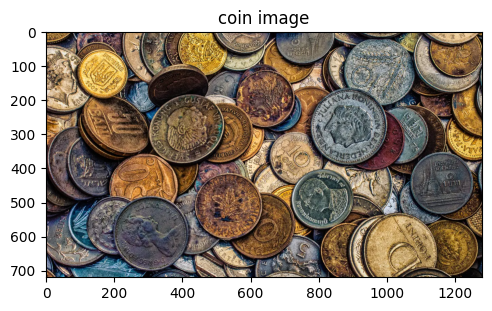

In [4]:
image = cv2.imread('//content/coin.jpg')
imshow('coin image', image)

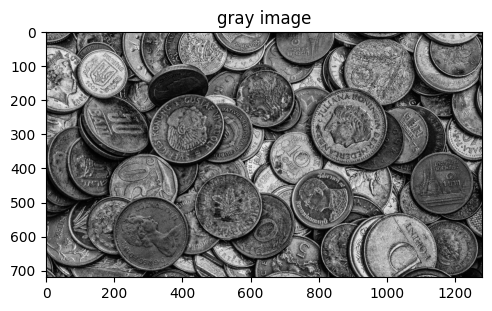

In [5]:
# convert above image to gray scale

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('gray image', gray_image)

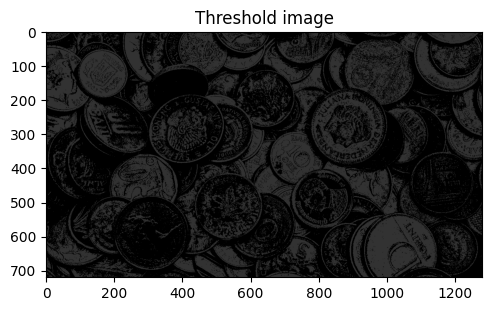

In [6]:
# thresholding

_,th2 = cv2.threshold(gray_image, 0, 50, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow('Threshold image', th2)

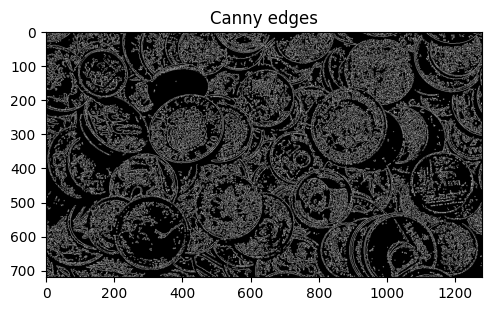

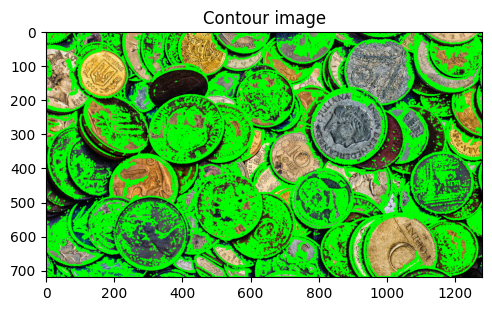

In [7]:
# finding contours

edges = cv2.Canny(th2, 0, 100, 10)
imshow('Canny edges', edges)

contours, hierarchy = cv2.findContours(th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0,255,0),3)
imshow('Contour image', image)


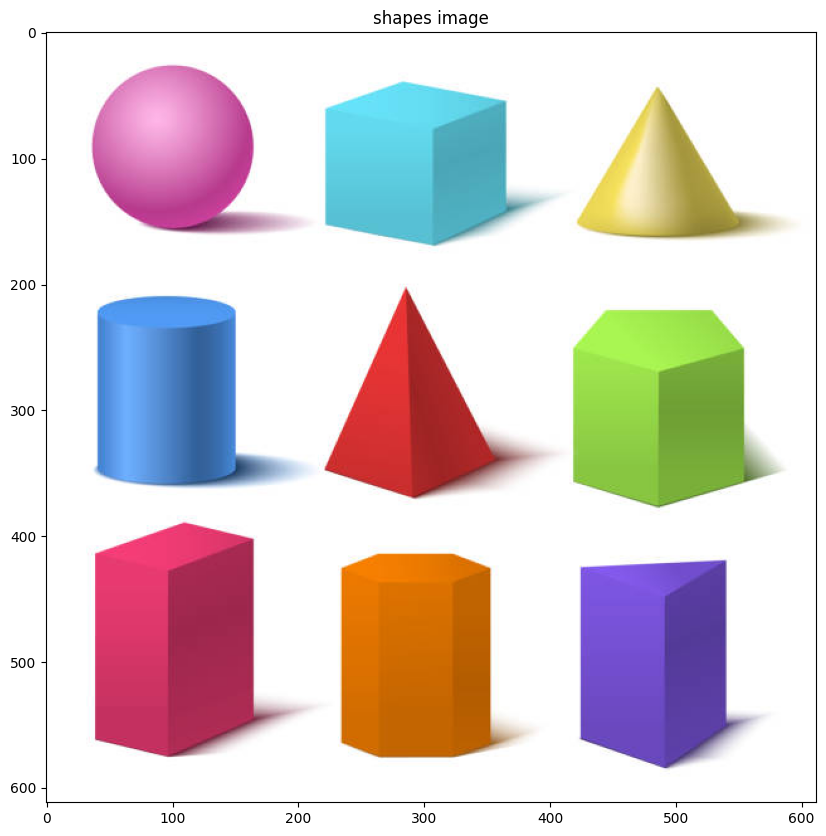

In [9]:
image = cv2.imread('/content/shapes.jpg')
imshow('shapes image', image)

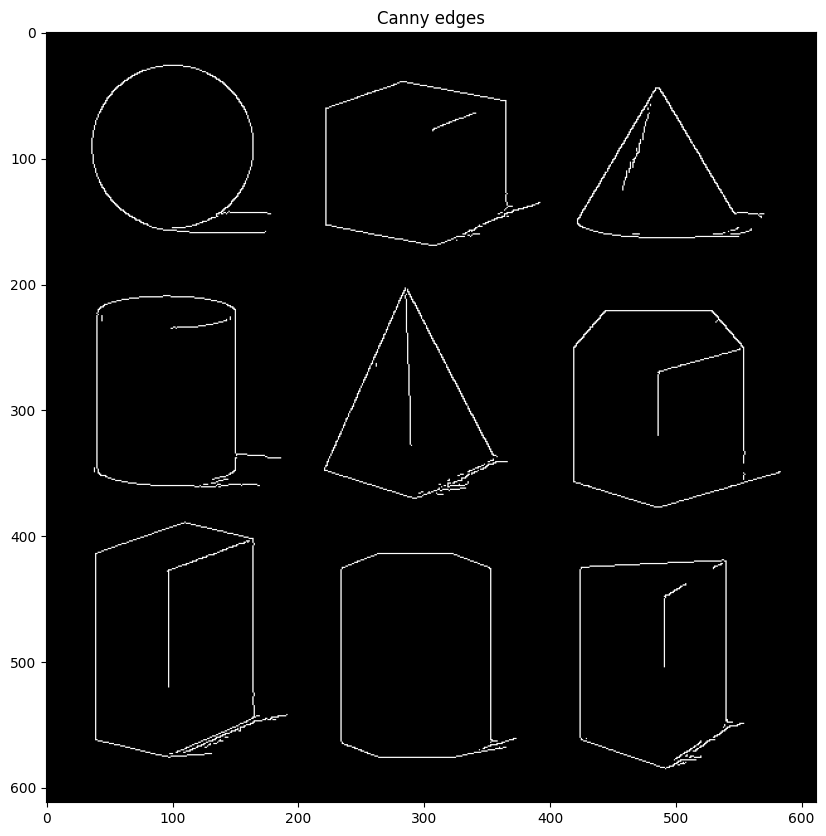

In [10]:
edged = cv2.Canny(image, 150,200)
imshow('Canny edges', edged)

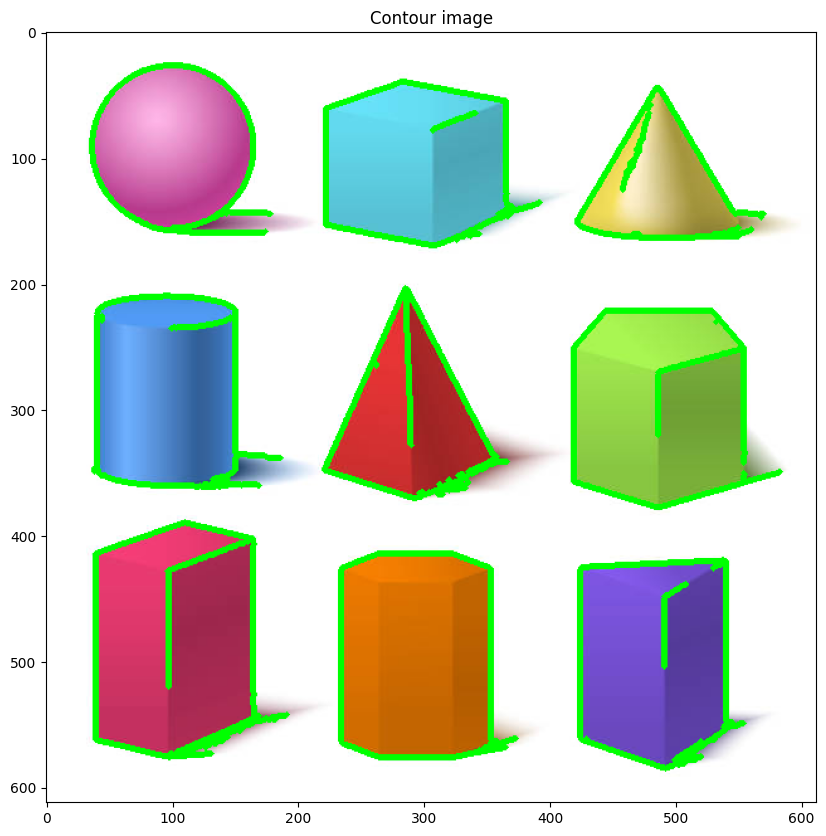

In [11]:
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, contours, -1, (0,255,0),3)
imshow('Contour image', image)


[1.5, 0.5, 0.0, 0.0, 0.5, 10.5, 8.0, 1.0, 0.0, 5.0, 0.0, 0.0, 11.0, 9.0, 2.5, 11.0, 10.0, 13.5, 45.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.5, 0.0, 5.0, 0.0, 0.0, 1.5, 0.0, 2.0, 6.0, 0.5, 4.0, 0.0, 3.0, 0.5, 0.0, 0.0, 53.5, 13.0, 0.0, 63.5, 42.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5, 1.0, 6.0, 0.0, 0.0, 14.0, 1.0, 1.0, 6.0, 0.0, 5.5, 0.0, 0.0, 121.0, 5.5, 111.0]
[121.0, 111.0, 63.5, 53.5, 45.0, 42.0, 14.0, 13.5, 13.0, 11.0, 11.0, 10.5, 10.0, 9.0, 8.0, 6.0, 6.0, 6.0, 5.5, 5.5, 5.0, 5.0, 4.0, 3.0, 2.5, 2.0, 2.0, 1.5, 1.5, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


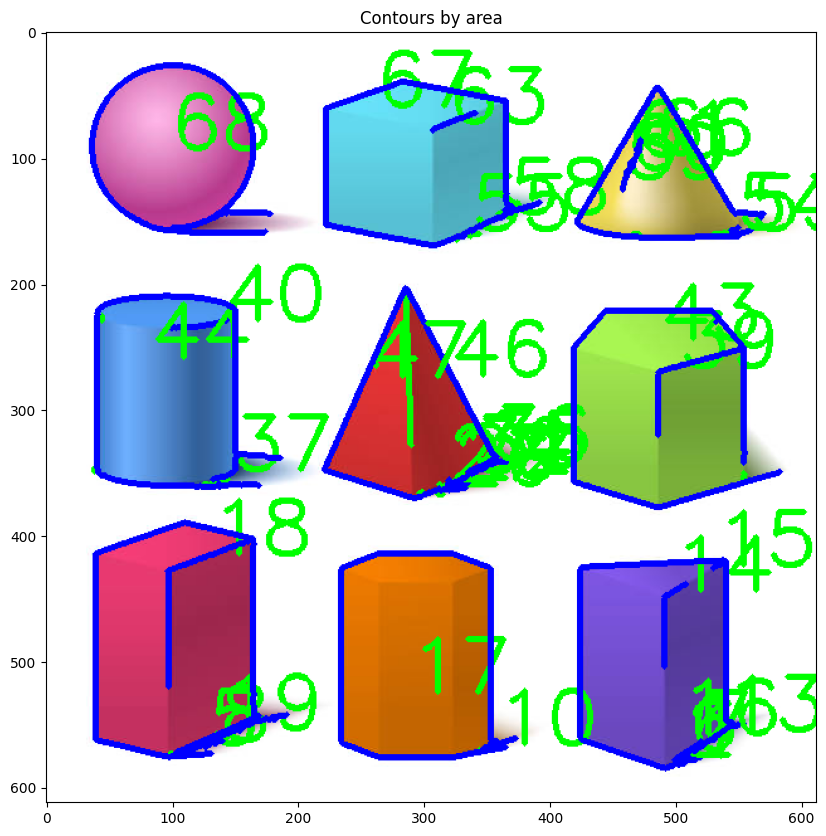

In [12]:
def get_contour_area(contours):
  all_areas = []
  for cnt in contours:
    area = cv2.contourArea(cnt)
    all_areas.append(area)
  return all_areas

print(get_contour_area(contours))

# sort contours by area
sorted_contours = sorted(contours, key = cv2.contourArea, reverse = True)

print(get_contour_area(sorted_contours))

for (i,c) in enumerate(contours):
  M = cv2.moments(c)
  if M['m00'] != 0:
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

imshow('Contours by area', image)

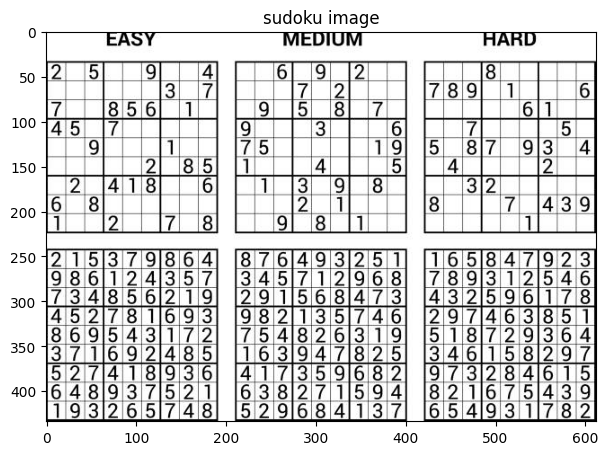

In [13]:
image = cv2.imread('/content/sudoku.jpg')
imshow('sudoku image', image)

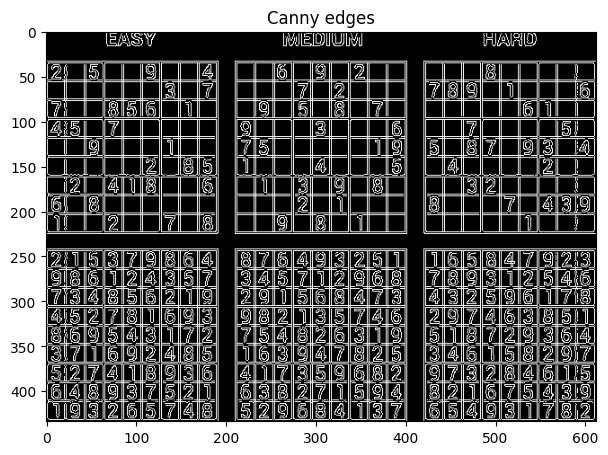

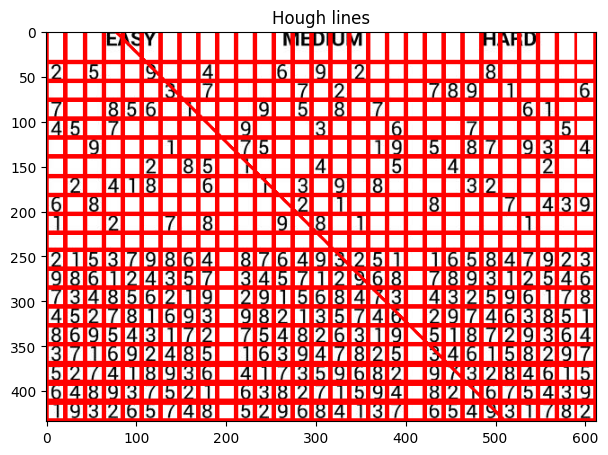

In [14]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

edges = cv2.Canny(gray_image, 150,200)
imshow('Canny edges', edges)


lines = cv2.HoughLines(edges, 1, np.pi /180, 240)

# converting the lines to hough lines format

for line in lines:
  rho, theta = line[0]
  a = np.cos(theta)
  b = np.sin(theta)
  x0 = a*rho
  y0 = b*rho
  x1 = int(x0 + 1000*(-b))
  y1 = int(y0 + 1000*(a))
  x2 = int(x0 - 1000*(-b))
  y2 = int(y0 - 1000*(a))
  cv2.line(image, (x1,y1), (x2,y2), (0,0,255), 2)

imshow('Hough lines', image)

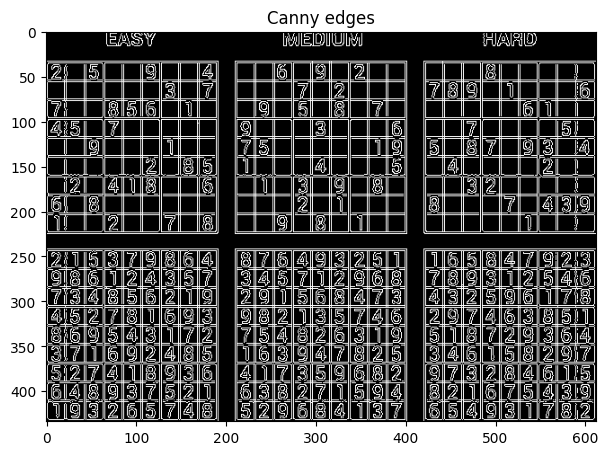

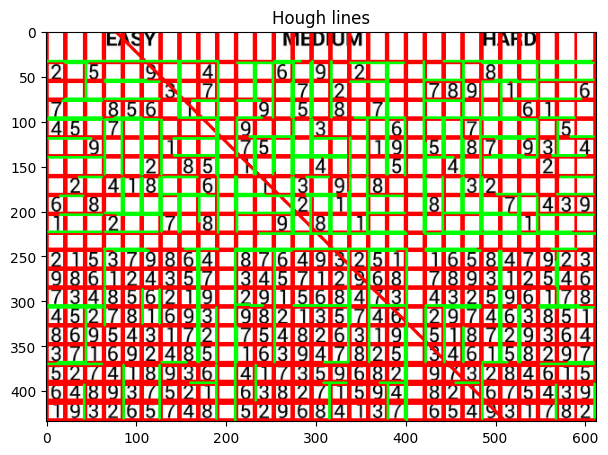

In [15]:
edges = cv2.Canny(gray_image, 100, 170, 3)
imshow('Canny edges', edges)

lines = cv2.HoughLinesP(edges, 1, np.pi/180, 100, 3 , 25)

for x in range(0,len(lines)):
  for x1, y1, x2, y2 in lines[x]:
    cv2.line(image, (x1,y1), (x2,y2), (0,255,0), 2)

imshow('Hough lines', image)

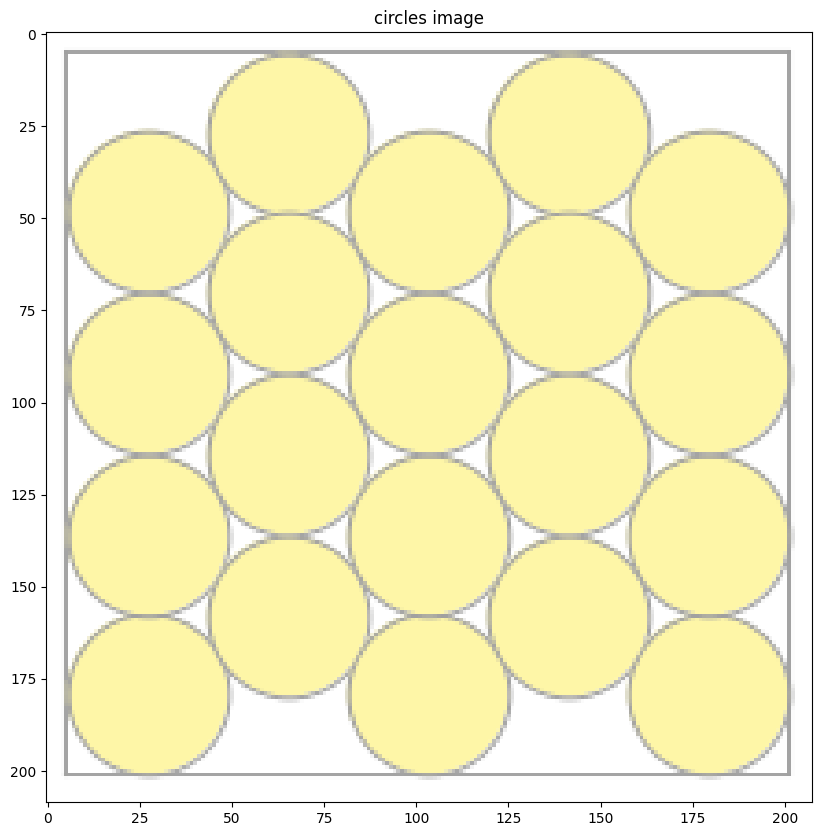

In [16]:
image = cv2.imread('/content/circles.jpg')
imshow('circles image', image)

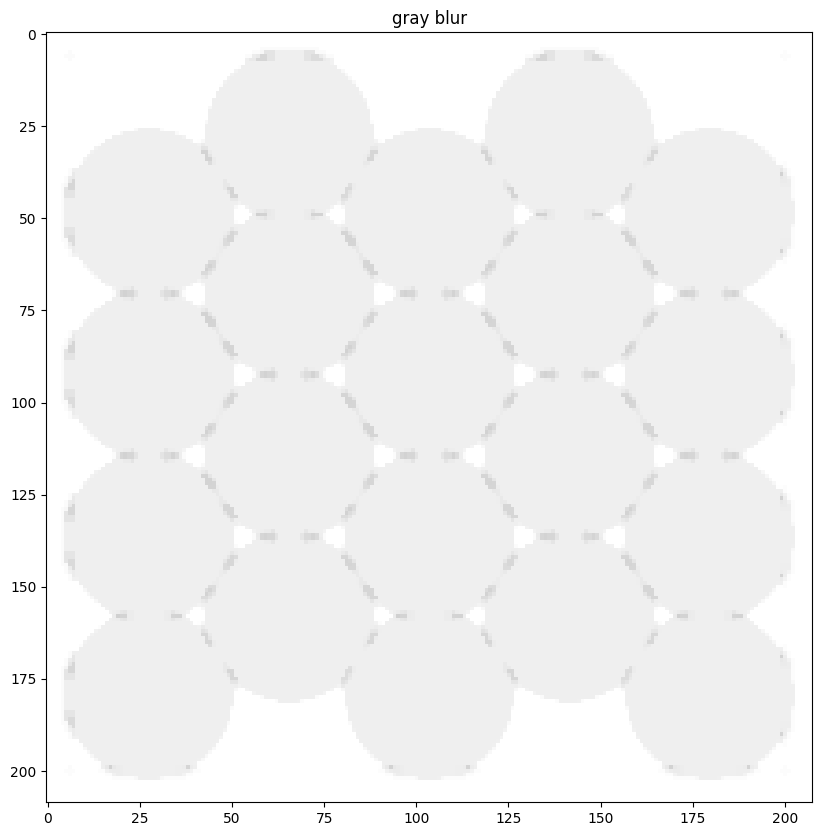

In [17]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.medianBlur(gray, 5)
imshow('gray blur', gray_blur)

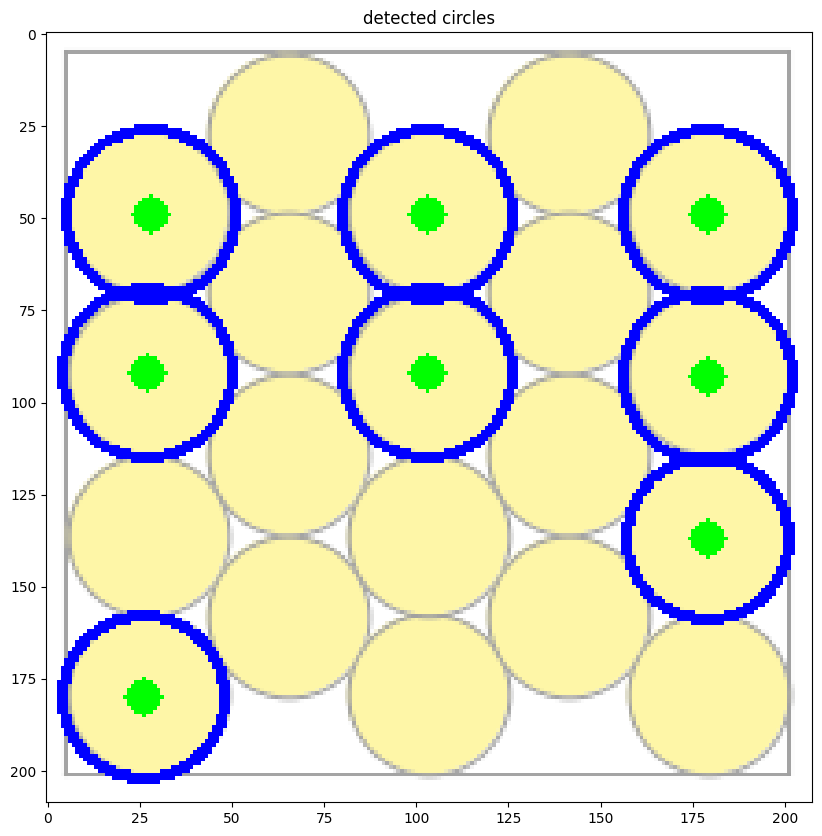

In [21]:
circles = cv2.HoughCircles(gray_blur, cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, param2 = 30, minRadius = 0, maxRadius = 0)

cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 2, 100)

for i in circles[0,:]:
  cv2.circle(image, (int(i[0]), int(i[1])), int(i[2]), (255,0,0), 2)
  cv2.circle(image, (int(i[0]), int(i[1])), 2, (0,255,0), 5)

imshow('detected circles', image)

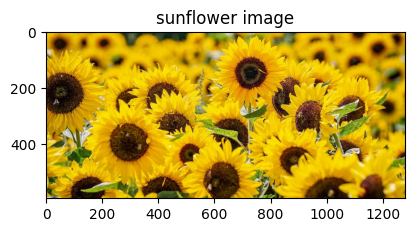

In [26]:
image = cv2.imread('/content/sunflower.jpg')
imshow('sunflower image', image)

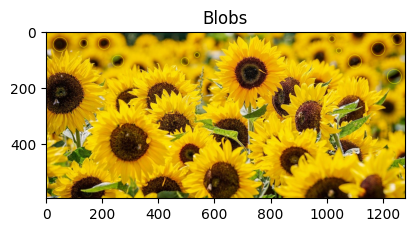

In [28]:
detector = cv2.SimpleBlobDetector_create()
keypoints = detector.detect(image)


# drawing detected blobs as circles

blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

imshow('Blobs', blobs)

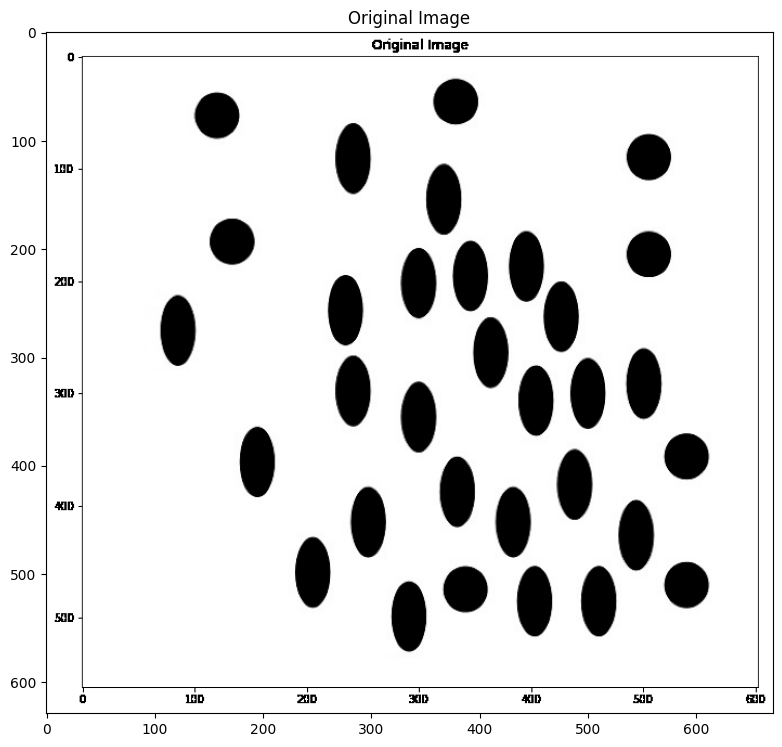

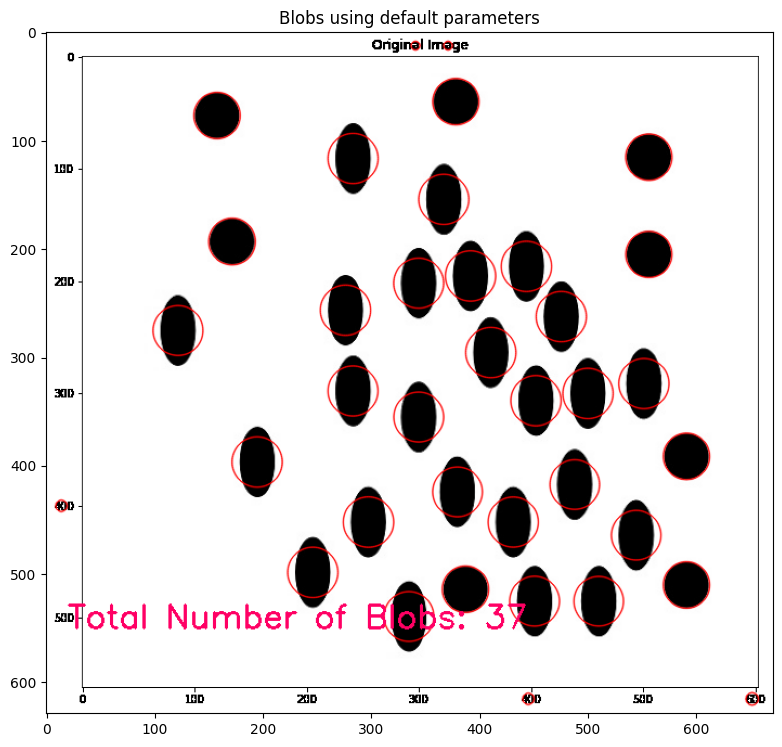

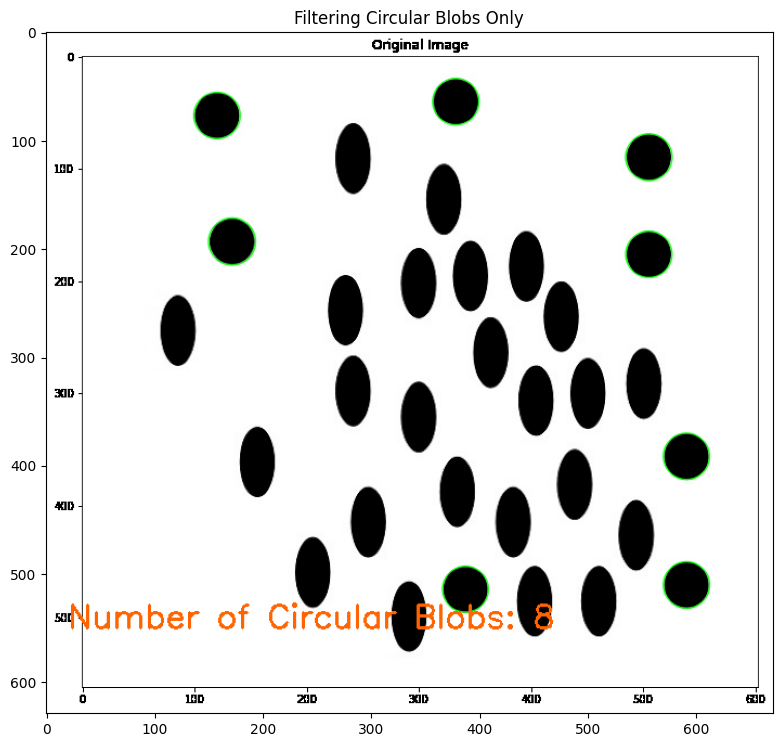

In [30]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image
image = cv2.imread("/content/blobs.jpg", 0)
imshow('Original Image',image)

# Intialize the detector using the default parameters
detector = cv2.SimpleBlobDetector_create()

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
imshow("Blobs using default parameters", blobs)

# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2

# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
imshow("Filtering Circular Blobs Only", blobs)


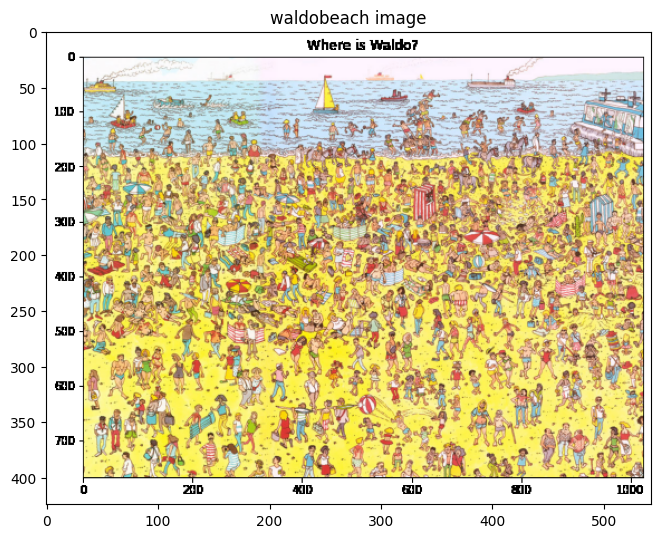

In [31]:
image = cv2.imread('/content/waldobeach.jpg')
imshow('waldobeach image', image)

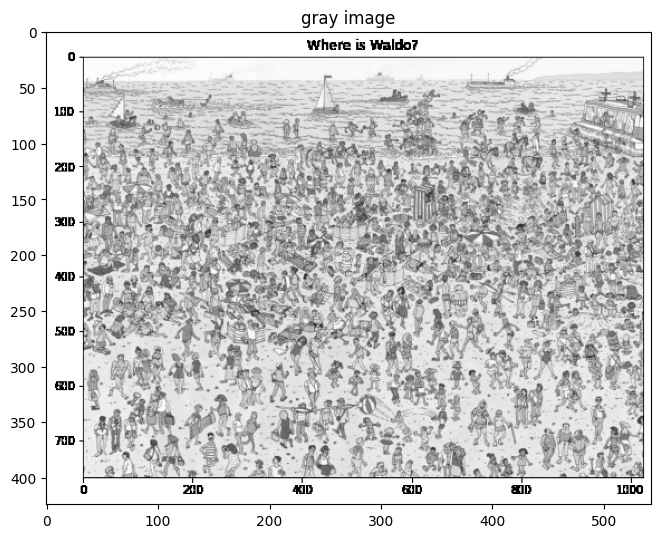

In [32]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('gray image', gray)

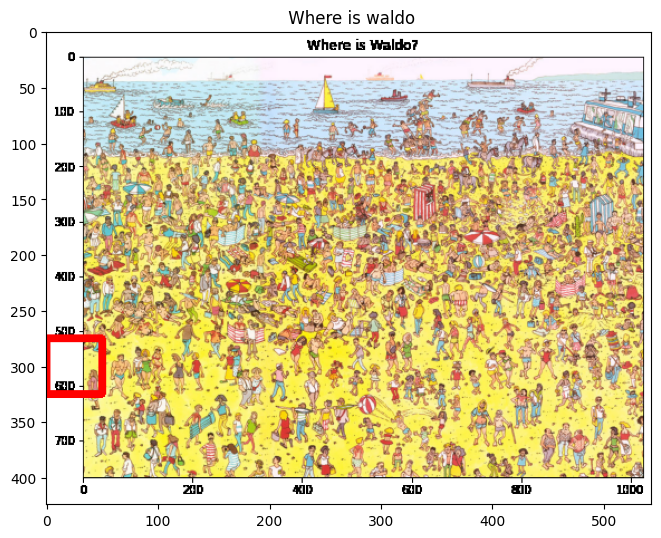

In [37]:
template = cv2.imread('/content/waldo.jpg', 0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

top_left = max_loc

bottom_right = (top_left[0] + 50 , top_left[1] + 50)

cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

imshow(' Where is waldo', image)

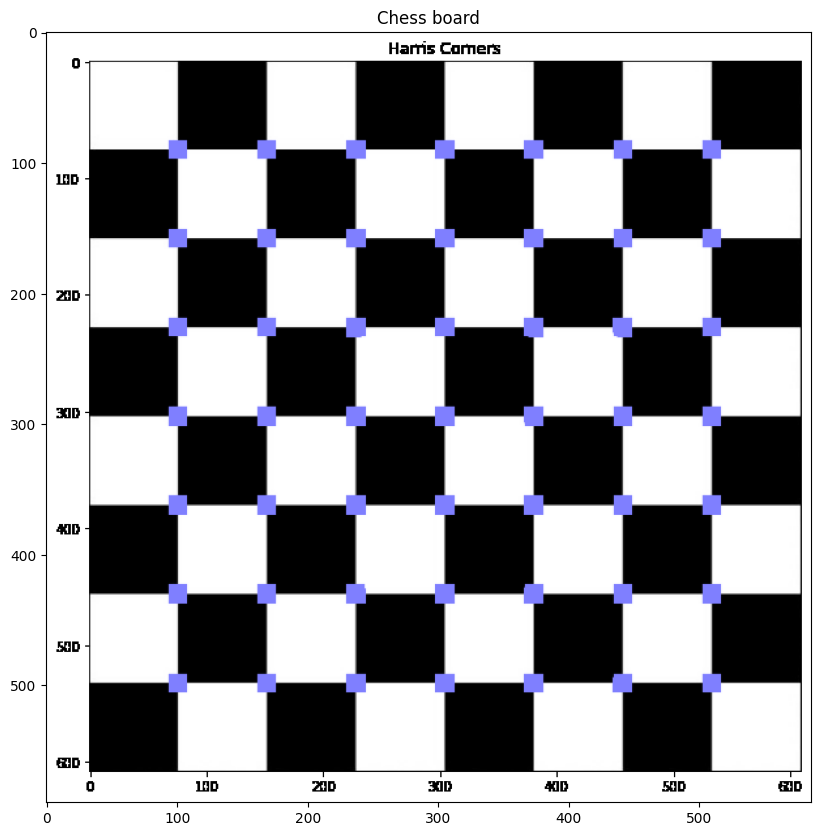

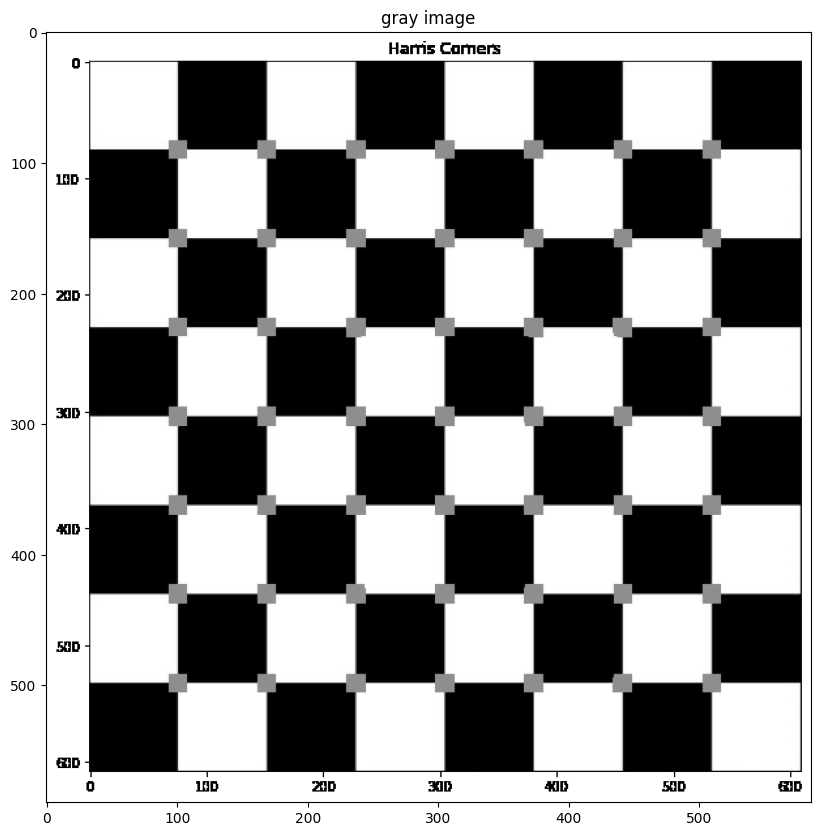

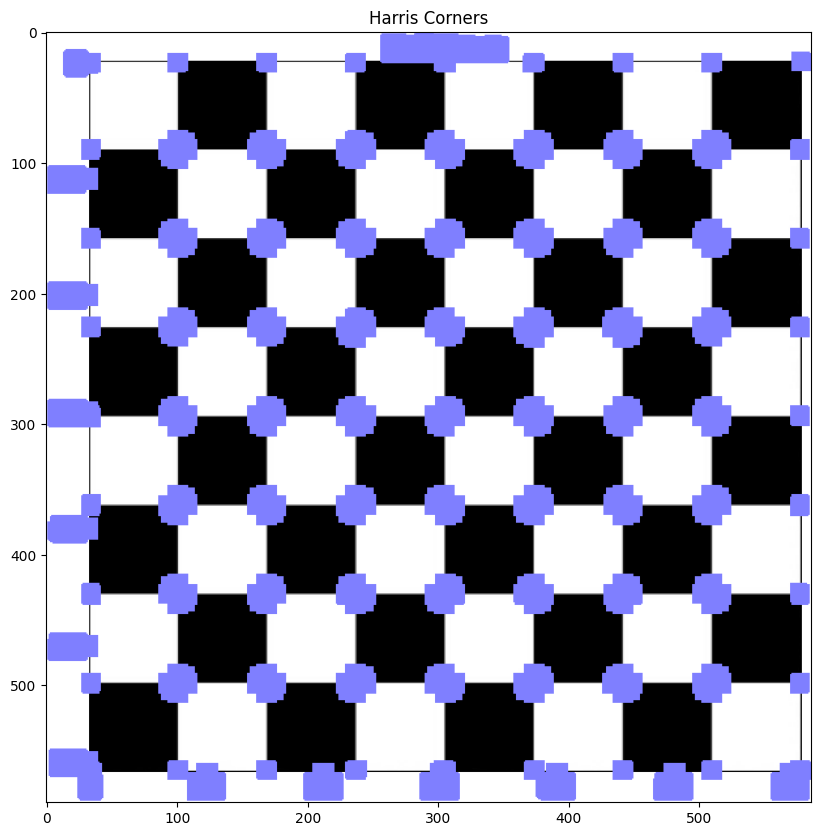

In [38]:
image = cv2.imread('/content/chess.jpg')
imshow('Chess board', image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
imshow('gray image', gray)

# harris corner requires image to be float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

# dilate corner image to enhance corner points
kernel = np.ones((7,7), np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

imshow('Harris Corners', image)